# Title

**Exercise: A.2 - Simple kNN regression**

# Description

The goal of this exercise is to **re-create the plots** below from the lecture.



<img src="../img/plot2.png" style="width: 500px;">
<img src="../img/plot3.png" style="width: 500px;">

# Instructions:
Part 1 **KNN by hand for k=1**

- Read the Advertisement data 
- Get a subset of the data from row 5 to row 13
- Apply the kNN algorithm by hand and plot the first graph as given above.

Part 2 **Using sklearn package**
- Read the entire Advertisement dataset
- Split the data into train and test sets using `train_test_split()` function
- Select `k_list` as possible k values ranging from 1 to 70.
- For each value of k in `k_list`:
    - Use sklearn `KNearestNeighbors()` to fit train data
    - Predict on the test data
    - Use the helper code to get the second plot above for k=1,10,70

# Hints:
<a href="https://numpy.org/doc/stable/reference/generated/numpy.argsort.html" target="_blank">np.argsort()</a> : Returns the indices that would sort an array. 

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html" target="_blank">df.iloc[]</a> : Returns a subset of the dataframe that is contained in the column range passed as the argument

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html" target="_blank">df.values</a> : Returns a Numpy representation of the DataFrame.

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html" target="_blank">pd.idxmin()</a> : Returns index of the first occurrence of minimum over requested axis.

<a href="http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/numpy-html-1.14.0/reference/generated/numpy.ndarray.min.html" target="_blank">np.min()</a> : Returns the minimum along a given axis.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html" target="_blank">np.max()</a> : Returns the maximum along a given axis.

<a href="https://numpy.org/devdocs/reference/generated/numpy.zeros.html" target="_blank">np.zeros()</a> : Returns a new array of given shape and type, filled with zeros.

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">train_test_split(X,y)</a> : Split arrays or matrices into random train and test subsets.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html" target="_blank">np.linspace()</a> : Returns evenly spaced numbers over a specified interval.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html" target="_blank">KNeighborsRegressor(n_neighbors=k_value)</a> : Regression-based on k-nearest neighbors.

Note: This exercise is **auto-graded and you can try multiple attempts.**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# take a quick look of the dataset

df_adv = pd.read_csv("Advertising.csv")
df_adv.head(6)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2


## Part 1: KNN by hand for $k=1$

In [6]:
# Get a subset of the data rows 6 to 13 and only TV advertisement. 
# The first row in the dataframe is the first row and not the zeroth row. 
data_x = df_adv.TV.iloc[5:13]
data_y = df_adv.Sales.iloc[5:13]

# Sort the data

idx = np.argsort(data_x).values # Get indices ordered from lowest to highest values

# Get the actual data in the order from above and turn them into numpy arrays. 

data_x  = data_x.iloc[idx].values
data_y  = data_y.iloc[idx].values

In [15]:
### edTest(test_findnearest) ###
# Define a function that finds the index of the nearest neighbor 
# and returns the value of the nearest neighbor.  Note that this 
# is just for k = 1 and the distance function is simply the 
# absolute value.

def find_nearest(array,value):
    idx = pd.Series(np.absolute(array-value)).idxmin() # hint: use pd.idxmin()
    return idx, array[idx]

In [16]:
# Create some artificial x-values (might not be in the actual dataset)

x = np.linspace(np.min(data_x), np.max(data_x))

# Initialize the y-values to zero

y = np.zeros( (len(x)))

In [17]:
# Apply the KNN algorithm.  Try to predict the y-value at a given x-value
# Note:  You may have tried to use the `range' method in your code.  Enumerate 
# is far better in this case.  

# Try to understand why.

for i, xi in enumerate(x):
    y[i] = data_y[find_nearest( data_x, xi )[0]]

### Plotting the data

Text(0, 0.5, 'Sales in $1000')

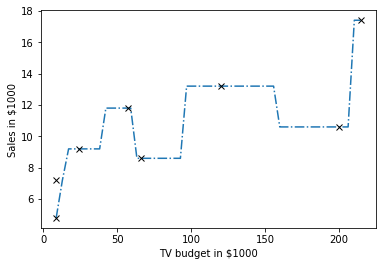

In [21]:
# Plot your solution    
plt.plot(x,y, '-.')
# Plot the original data using black x's.
plt.plot(data_x, data_y, 'kx')
plt.title('')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')


## Part 2: KNN for $k\ge1$ using sklearn

In [22]:
# import train_test_split and KNeighborsRegressor from sklearn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [23]:
### Reading the complete Advertising dataset

# This time you are expected to read the entire dataset

data_filename = 'Advertising.csv'

# Read advertising.csv file using the pandas library (using pandas.read_csv)

df = pd.read_csv(data_filename)

# Choose sales as your response variable 'y' and 'TV' as your 'predictor variable'   

x = df[['TV']]
y = df['Sales']

In [25]:
### edTest(test_shape) ###

# Split the dataset in training and testing with 60% training set and 40% testing set 
# with random state = 42 to fix the output of train and test data (if not, any time using train_test_split on the same data, the train and test data are different)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6, random_state=42)

In [26]:
### edTest(test_nums) ###
# Choosing 
k_value_min = 1
k_value_max = 70

# creating list of integer k values betwwen k_value_min and k_value_max using linspace

k_list = np.linspace(k_value_min, k_value_max, 70)

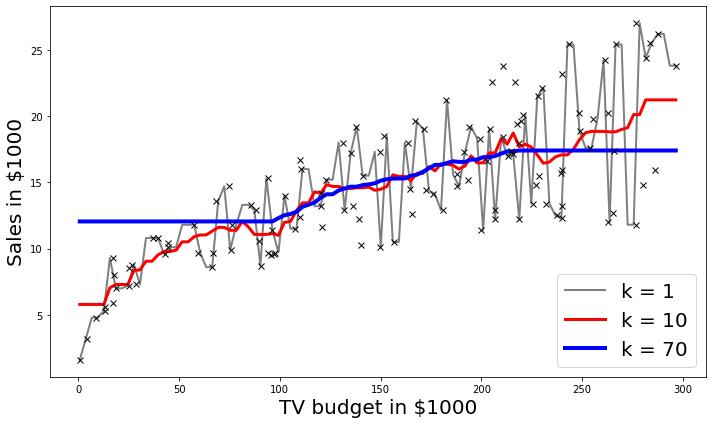

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
j=0
# Looping over k values
for k_value in k_list:   
    
    # creating KNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # fitting model 
    model.fit(x_train, y_train)
    
    # test predictions  
    y_pred = model.predict(x_test)
    
    ## Plotting
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()

In the plotting code above, re-run `ax.plot(x_train, y_train,'x',label='test',color='k')` but this time with `x_test` and `y_test`. 

According to you works , which k value is the best. Why?

*Your answer here*

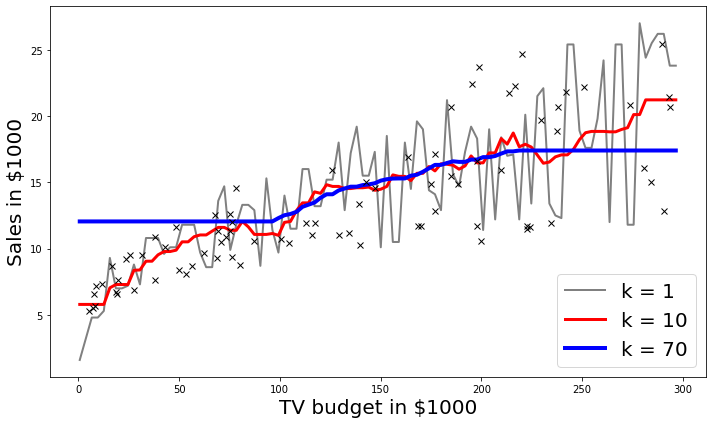

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
j=0
# Looping over k values
for k_value in k_list:   
    
    # creating KNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # fitting model 
    model.fit(x_train, y_train)
    
    # test predictions  
    y_pred = model.predict(x_test)
    
    ## Plotting
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_test, y_test,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()